# Optimize the Model

Achieve a target predictive accuracy higher than 75% by using "any or all" of the following:

1) Adjusting the input data to ensure that there are no variables or outliers that are causing confusion in the model, such as:
    
    Dropping more or fewer columns.
    
    Creating more bins for rare occurrences in columns.
    
    Increasing or decreasing the number of values for each bin.

2) Adding more neurons to a hidden layer.
3) Adding more hidden layers.
4) Using different activation functions for the hidden layers.
5) Adding or reducing the number of epochs to the training regimen.

Current Parameters:

In [1]:
# Cutoffs
application_cutoff = 200 # Original: 200, Applications types with less than this number will be added to a combined type
classification_cutoff = 1000 # Original: 1000, Classification types with less than this number will be added to a combined type

# Number of Neurons
neurons_1 = 5  # Original: 80
neurons_2 = 5  # Original: 30
neurons_3 = 3
neurons_4 = 7

# Activation Types
activation_1 = "sigmoid" # Original: "relu"
activation_2 = "sigmoid" # Original: "relu"
activation_3 = "sigmoid"
activation_4 = "sigmoid"
activation_outer = "sigmoid" # Original: "sigmoid"

#Number of Epochs
num_epochs = 20 # Original: 50

# Preprocessing

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import keras

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


The features of this model will be APPLICATION_TYPE, AFFILIATION, CLASSIFICATION, USE_CASE, ORGANIZATION, STATUS, INCOME_AMT, SPECIAL_CONSIDERATIONS, and ASK_AMT.

The target of this model will be IS_SUCCESSFUL.

In [3]:
application_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [4]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_prep = application_df.drop(['EIN', 'NAME'], axis = 1)

In [5]:
# Determine the number of unique values in each column.
application_prep.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

Categorical Columns with more than 10 unique values: APPLICATION_TYPE (17), CLASSIFICATION (71)

In [6]:
# Look at APPLICATION_TYPE value counts for binning
application_types = pd.Series(application_prep['APPLICATION_TYPE']).value_counts()
application_types

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Choose a cutoff value and create a list of application types to be replaced - Starter_Code cutoff was between 156 and 528
bin_name = f"Less_Than_{application_cutoff}"

# use the variable name `application_types_to_replace`
application_types_to_replace = []

for app, count in application_types.iteritems():
    if count < application_cutoff:
        application_types_to_replace.append(app)

# Replace in dataframe
for app in application_types_to_replace:
    application_prep['APPLICATION_TYPE'] = application_prep['APPLICATION_TYPE'].replace(app, bin_name)

# Check to make sure binning was successful
application_prep['APPLICATION_TYPE'].value_counts()

T3               27037
T4                1542
T6                1216
T5                1173
T19               1065
T8                 737
T7                 725
T10                528
Less_Than_200      276
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
classification_types = pd.Series(application_prep['CLASSIFICATION']).value_counts()
classification_types

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [9]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_types[classification_types > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [10]:
# Choose a cutoff value and create a list of classifications to be replaced - Starter_Code cutoff was between 1883 and 777
bin_name = f"Less_Than_{classification_cutoff}"

# use the variable name `classifications_to_replace`
classifications_to_replace = []

for classification, count in classification_types.iteritems():
    if count < classification_cutoff :
        classifications_to_replace.append(classification)

# Replace in dataframe
for classification in classifications_to_replace:
    application_prep['CLASSIFICATION'] = application_prep['CLASSIFICATION'].replace(classification,bin_name)
    
# Check to make sure binning was successful
application_prep['CLASSIFICATION'].value_counts()

C1000             17326
C2000              6074
C1200              4837
Less_Than_1000     2261
C3000              1918
C2100              1883
Name: CLASSIFICATION, dtype: int64

In [11]:
application_prep.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [12]:
# Convert categorical data to numeric with `pd.get_dummies`
application_dummies = pd.get_dummies(application_prep)

In [13]:
application_dummies.columns

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Less_Than_200',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_Less_Than_1000', 'USE_CASE_CommunityServ',
       'USE_CASE_Heathcare', 'USE_CASE_Other', 'USE_CASE_Preservation',
       'USE_CASE_ProductDev', 'ORGANIZATION_Association',
       'ORGANIZATION_Co-operative', 'ORGANIZATION_Corporation',
       'ORGANIZATION_Trust', 'INCOME_AMT_0', 'INCOME_AMT_1-9999',
       'INCOME_AMT_10000-24999', 'INCOME_AMT_100000-499999',
       'INCOME_AMT_10M

### Separate Target and Features into Training and Testing Sets

In [14]:
# Split our preprocessed data into our features and target arrays
X = application_dummies.drop(['IS_SUCCESSFUL'], axis = 1)
y = application_dummies['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Compile, Train and Evaluate the Model

In [16]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_features = len(X_train_scaled[0])

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units = neurons_1, activation = activation_1, input_dim = num_features))

# Second hidden layer ("If Necessary")
nn.add(tf.keras.layers.Dense(units = neurons_2, activation = activation_2))

# Third hidden layer ("If Necessary")
nn.add(tf.keras.layers.Dense(units = neurons_3, activation = activation_3))

# Third hidden layer ("If Necessary")
nn.add(tf.keras.layers.Dense(units = neurons_4, activation = activation_4))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation = activation_outer))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 220       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 28        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 8         
Total params: 304
Trainable params: 304
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
# Create a callback that saves the model's weights every 5 epochs.
batch_size = 30
mc = keras.callbacks.ModelCheckpoint('Optimized_Weights/weights{epoch:08d}.h5', save_weights_only=True, save_freq=5*batch_size, verbose = 0)

In [19]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=num_epochs, callbacks=[mc])

Epoch 1/20
804/804 [==============================] - 0s 476us/step - loss: 0.6832 - accuracy: 0.5758
Epoch 2/20
804/804 [==============================] - 0s 464us/step - loss: 0.6027 - accuracy: 0.7253
Epoch 3/20
804/804 [==============================] - 0s 476us/step - loss: 0.5786 - accuracy: 0.7282
Epoch 4/20
804/804 [==============================] - 0s 465us/step - loss: 0.5763 - accuracy: 0.7294
Epoch 5/20
804/804 [==============================] - 0s 471us/step - loss: 0.5757 - accuracy: 0.7280
Epoch 6/20
804/804 [==============================] - 0s 476us/step - loss: 0.5751 - accuracy: 0.7296
Epoch 7/20
804/804 [==============================] - 0s 465us/step - loss: 0.5748 - accuracy: 0.7284
Epoch 8/20
804/804 [==============================] - 0s 464us/step - loss: 0.5743 - accuracy: 0.7294
Epoch 9/20
804/804 [==============================] - 0s 476us/step - loss: 0.5740 - accuracy: 0.7281
Epoch 10/20
804/804 [==============================] - 0s 466us/step - loss: 0.573

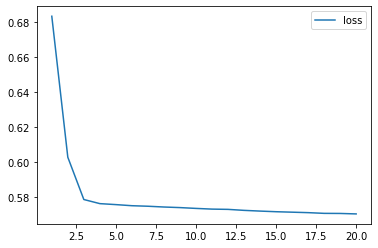

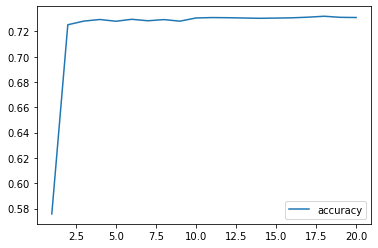

In [20]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
history_df.plot(y="accuracy");

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 0.5716071128845215, Accuracy: 0.7323614954948425


In [22]:
# Save and export your results to an HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")

In [23]:
# Load the model
from tensorflow.keras.models import load_model
voice_model = load_model("AlphabetSoupCharity_Optimization.h5")

In [24]:
model_loss, model_accuracy = voice_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.5716071128845215, Accuracy: 0.7323614954948425


## Values Before Optimization

    268/268 - 0s - loss: 0.5555 - accuracy: 0.7297
    Normal Neural Network - Loss: 0.5554825067520142, Accuracy: 0.72967928647995

## Automated Optimization

In [25]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=30,
        step=2), activation=activation, input_dim=num_features))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=30,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [26]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=50,
    hyperband_iterations=2)

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [27]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled, y_train, epochs = 20, validation_data=(X_test_scaled,y_test))

INFO:tensorflow:Oracle triggered exit


In [28]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'sigmoid',
 'first_units': 5,
 'num_layers': 4,
 'units_0': 9,
 'units_1': 5,
 'units_2': 5,
 'units_3': 3,
 'units_4': 7,
 'units_5': 5,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 7,
 'tuner/bracket': 1,
 'tuner/round': 1,
 'tuner/trial_id': '0051'}

In [29]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5756 - accuracy: 0.7335
Loss: 0.575576663017273, Accuracy: 0.7335277199745178


In [30]:
# Evaluate the top 3 models against the test dataset
top_model = tuner.get_best_models(3)
for model in top_model:
    model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5756 - accuracy: 0.7335
Loss: 0.575576663017273, Accuracy: 0.7335277199745178
268/268 - 0s - loss: 0.5729 - accuracy: 0.7334
Loss: 0.5729117393493652, Accuracy: 0.7334110736846924
268/268 - 0s - loss: 0.5750 - accuracy: 0.7329
Loss: 0.5750446319580078, Accuracy: 0.7329446077346802


In [31]:
X_train_scaled.shape, X_test_scaled.shape

((25724, 43), (8575, 43))